# Projet numérique

Equations de Lokta-Volterra:

$\dot{x_1} = x_1 (\alpha - \beta x_2)$

$\dot{x_2} = - x_2 (\gamma - \delta x_1)$

où $x_1$ et $x_2$ désignent le nombre (positif de proies et de prédateurs respectivements et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

In [3]:
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt

In [25]:
alpha=2/3
beta=4/3
gamma=1
delta=1

In [30]:
def f(x1,x2):
    return(x1*(alpha-beta*x2),-x2*(gamma-delta*x1))

f_vec=np.vectorize(f)

## Question 1

Interprétation physique de chacun des termes :

* $\alpha$ est le taux de reproduction des proies, indépendamment des prédateurs
* $\beta$ est le taux de mortalité des proies à cause des prédateurs
* $\gamma$ est le taux de reproduction des prédateurs, dépendant du nombre de proies rencontrées et mangées
* $\delta$ est le taux de mortalité des prédateurs, indépendamment des proies

Points d'équilibre :
Soit $(x_1,x_2) \in \mathbb{R^2}$,

$
(x_1,x_2) \: point \: d'équilibre
\Leftrightarrow
\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 (\alpha - \beta x_2) = 0 \\
        & - x_2 (\gamma - \delta x_1) = 0\\
      \end{aligned}
    \right.
\end{equation}
$
$\Leftrightarrow
\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 = 0 \\
        & x_2 = 0\\
      \end{aligned}
    \right.
\end{equation}
$
ou
$\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 = \frac{\gamma}{\delta} \\
        & x_2 = \frac{\alpha}{\beta}\\
      \end{aligned}
    \right.
\end{equation}
$
car les paramètres $\delta$ et $\beta$ sont non nuls.

Donc il existe 2 points d'équilibres :
* (0,0)
* $\bar{x} = (\frac{\gamma}{\delta} , \frac{\alpha}{\beta}) \in \mathbb{R_{>0}} \times \mathbb{R_{>0}}$ car les paramètres $\alpha$, $\beta$, $\gamma$, $\delta$ sont strictements positifs.

On ne peut a priori rien dire sur la stabilité des points d'équilibre.

## Question 2

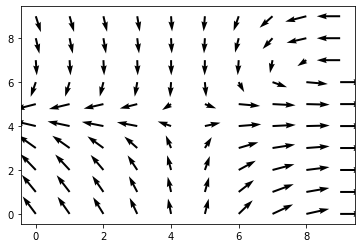

In [44]:
x1 = np.linspace(-1,1,10)
x2 = np.linspace(-1,1,10)
X1,X2 = np.meshgrid(x1,x2)
x,y=f_vec(X1,X2)
x=x/np.sqrt(x**2+y**2)
y=y/np.sqrt(x**2+y**2)
plt.quiver(x,y,scale_units='xy')

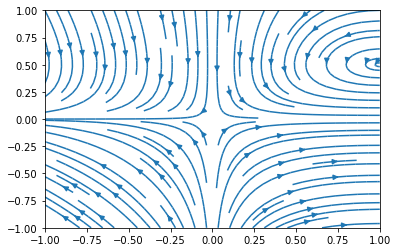

In [41]:
plt.streamplot(X1,X2,x,y)

## Question 3

## Question 4

On considère la fonction $H (x_1,x_2) = \delta x_1 - \gamma ln(x_1) + \beta x_2 - \alpha ln(x_2)$ définie sur $\mathbb{R_{>0}} \times \mathbb{R_{>0}}$.

Soit $(x_1(t),x_2(t))$ solution de système différentiel.

Alors, en dérivant $H$ par rapport à t, on obtient : $\forall t \in \mathbb{R}$,

$\begin{align} 
H'(t) & = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2} \\
& = \delta x_1 (\alpha - \beta x_2) - \gamma (\alpha - \beta x_2) - \beta x_2 (\gamma - \delta x_1) + \alpha (\gamma - \delta x_1) \\
& = (\alpha - \beta x_2) (\delta x_1 - \gamma) - (\alpha - \beta x_2) (\delta x_1 - \gamma) \\
& = 0
\end{align}$

Donc, $H = constante$

On considère la fonction $H (x_1,x_2) = \delta x_1 - \gamma ln(x_1) + \beta x_2 - \alpha ln(x_2)$ définie sur $\mathbb{R_{>0}} \times \mathbb{R_{>0}}$. Elle est dérivable sur l'ensemble $\mathbb{R_{>0}} \times \mathbb{R_{>0}}$ et 

$\forall (x_1,x_2) \in \mathbb{R_{>0}} \times \mathbb{R_{>0}}, 
\begin{align}
    \nabla H (x_1,x_2) = & \begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix}
\end{align}$

## Question 5

In [26]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.scatter([gamma/delta],[alpha/beta], label="x_barre")
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.legend
    plt.gca().set_aspect("equal")

In [27]:
def H(x,y, alpha=alpha, beta=beta, gamma=gamma, delta=delta):
    return delta * x - gamma * np.log(x) + beta * y - alpha * np.log(y)

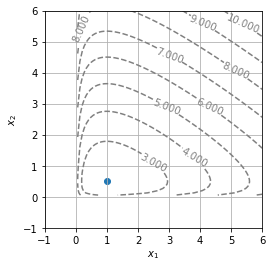

In [28]:
display_contour(
    H, 
    x=np.linspace(-1, 6, 100), 
    y=np.linspace(-1, 6, 100), 
    levels=10, # 10 levels, automatically selected
)

Un point d'équilibre a est stable si les solutions restent arbitrairement proche de a quand elles sont initialisées suffisamment proche de a.

## Question 6

## Question 7

## Question 8

## Question 9

## Question 10

Soit $(x_1(t),x_2(t))$ solution du nouveau système différentiel.

Alors, en dérivant $H$ par rapport à t, on obtient : $\forall t \in \mathbb{R}$,

$\begin{align} 
\frac{d}{dt} (H(x(t)) - H_0) & = \delta \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2} \\
& = (H(x(t)) - H_0) (-\delta u_1 + \gamma \frac{u_1}{x_1} -\beta u_2 + \alpha \frac{u_2}{x_2}) \\
& = - (H(x(t)) - H_0) [u_1 (\delta - \frac{\gamma}{x_1}) + u_2 (\beta - \frac{\alpha}{x_2})]\\
\end{align}$

Or $
\begin{align}
    \nabla H (x(t)) = & \begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix}
\end{align}$
Donc $\| \nabla H (x(t)) \|^2 = (\delta - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2$

En posant $u:(x_1,x_2) \to k \begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix}$, on obtient bien $\frac{d}{dt} (H(x(t)) - H_0) = - (H(x(t)) - H_0) (k (\delta - \frac{\gamma}{x_1})^2 + k (\beta - \frac{\alpha}{x_2})^2)$

Donc $\frac{d}{dt} (H(x(t)) - H_0) = - k \| \nabla H (x(t)) \|^2 (H(x(t)) - H_0) $

## Question 11